In [1]:
include("helper.jl")
include("algorithms.jl")
using NPZ
using MultivariateStats

# For autoreload file
#using Revise
#import helper

In [2]:
Threads.nthreads()

6

# Metropolis

## Overlap over time

In [5]:
#Global resuts
nb_iter = f(5000) + 10000
nb_exp = 100

a = 5.9
b = 0.1

0.1

In [4]:
# Define function to compute nb_iter in function of N
f(N) = ceil(Int64, 11 * N * log(N))

f (generic function with 1 method)

In [7]:
@time begin
    # Run for N=100
    N = 100
    x_star = generate_x(N)
    overlap_hat_metropolis_100 = run_experiment(N, a, b,
        x_star, metropolis, nb_iter, nb_exp)
    npzwrite("data/overlap_hat_metropolis_100.npy", overlap_hat_metropolis_100)
end

 82.277485 seconds (526.24 M allocations: 137.608 GiB, 53.76% gc time)


In [8]:
@time begin
    # Run for N=500
    N = 500
    x_star = generate_x(N)
    overlap_hat_metropolis_500 = run_experiment(N, a, b,
        x_star, metropolis, nb_iter, nb_exp)
    npzwrite("data/overlap_hat_metropolis_500.npy", overlap_hat_metropolis_500)
end

126.404479 seconds (526.24 M allocations: 594.784 GiB, 18.14% gc time)


In [6]:
@time begin
    # Run for N=1000
    N = 1000
    x_star = generate_x(N)
    overlap_hat_metropolis_1000 = run_experiment(N, a, b,
        x_star, metropolis, nb_iter, nb_exp)
    npzwrite("data/overlap_hat_metropolis_1000.npy", overlap_hat_metropolis_1000)
end

348.018835 seconds (529.62 M allocations: 1.125 TiB, 9.50% gc time, 0.32% compilation time)


In [ ]:
@time begin
    # Run for N=5000
    N = 5000
    x_star = generate_x(N)
    overlap_hat_metropolis_5000 = run_experiment(N, a, b,
        x_star, metropolis, nb_iter, nb_exp)
    npzwrite("data/overlap_hat_metropolis_5000.npy", overlap_hat_metropolis_5000)
end

In [ ]:
# Plots the result of the previous plots 
nb_iter = f(5000) + 10000
nb_exp = 100

a = 5.9
b = 0.1

overlap_hat_metropolis_100 = npzread("data/overlap_hat_metropolis_100.npy")
overlap_hat_metropolis_500 = npzread("data/overlap_hat_metropolis_500.npy")
overlap_hat_metropolis_1000 = npzread("data/overlap_hat_metropolis_1000.npy")
overlap_hat_metropolis_5000 = npzread("data/overlap_hat_metropolis_5000.npy")

Ns = Vector{Int64}([100, 500, 1000, 5000])
x_vlines = f.(Ns)

visualize_overlap(overlap_hat_metropolis_100[1, :],
    overlap_hat_metropolis_500[1, :],
    overlap_hat_metropolis_1000[1, :],
    overlap_hat_metropolis_5000[1, :],
    nb_exp, x_vlines, a, b, Vector{String}(["100","500","1000","5000"]), "Metropolis")

# Save figure
savefig("figures/overlap_metropolis.png")

## Overlap as a function of r

In [ ]:
nb_exp = 100
d = 3
nb_r = 10

In [ ]:
@time begin
    # Run for N=100
    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_100, range_r_100 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    npzwrite("data/overlap_r_vector_metropolis_100.npy", overlap_r_vector_metropolis_100)
end

In [ ]:
@time begin
    # Run for N=500
    N = 500
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_500, range_r_500 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    npzwrite("data/overlap_r_vector_metropolis_500.npy", overlap_r_vector_metropolis_500)
end

In [ ]:
@time begin
    # Run for N=1000
    N = 1000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_1000, range_r_1000 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    npzwrite("data/overlap_r_vector_metropolis_1000.npy", overlap_r_vector_metropolis_1000)
end

In [ ]:
@time begin
    # Run for N=5000
    N = 5000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_5000, range_r_5000 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    npzwrite("data/overlap_r_vector_metropolis_100.npy", overlap_r_vector_metropolis_100)
    npzwrite("data/overlap_r_vector_metropolis_5000.npy", overlap_r_vector_metropolis_5000)
end

### Plot results

In [7]:
npzread("data/overlap_r_vector_metropolis_100.npy")

10-element Vector{Float64}:
 0.7617999999999999
 0.8112
 0.8260000000000001
 0.7998000000000001
 0.8072000000000001
 0.7160000000000001
 0.46459999999999996
 0.138
 0.1016
 0.07039999999999999

In [4]:
exp10.(range(-3, 0, 10))

10-element Vector{Float64}:
 0.001
 0.0021544346900318843
 0.004641588833612777
 0.01
 0.021544346900318832
 0.046415888336127795
 0.1
 0.2154434690031884
 0.4641588833612779
 1.0

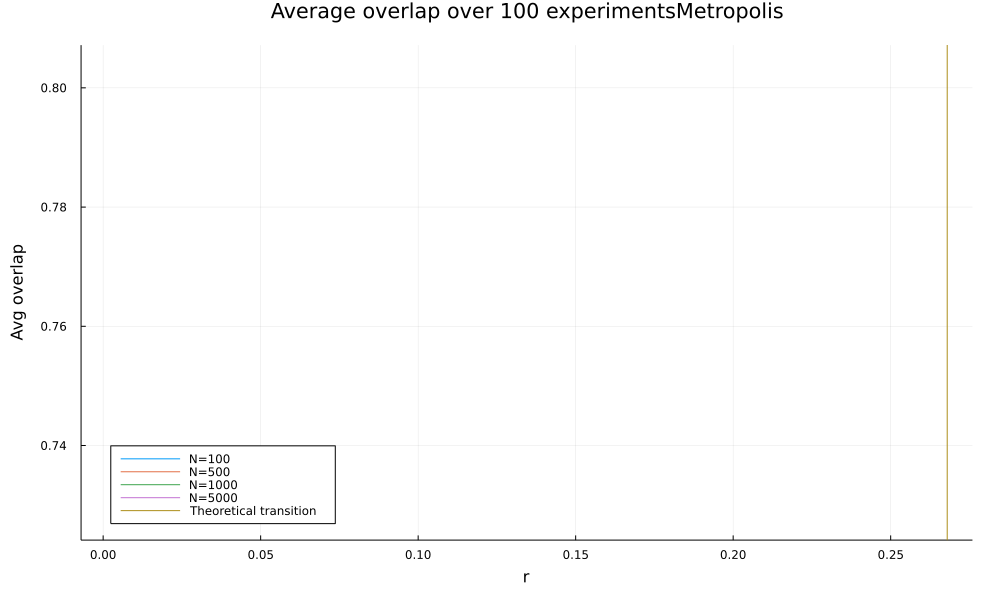

In [6]:
nb_exp = 100
d = 3

a = 5.9
b = 0.1

nb_r = 10

range_r_100 = exp10.(range(-3, 0, nb_r))

overlap_r_metropolis_100 = npzread("data/overlap_r_vector_metropolis_100.npy")
overlap_r_metropolis_500 = npzread("data/overlap_r_vector_metropolis_500.npy")
overlap_r_metropolis_1000 = npzread("data/overlap_r_vector_metropolis_1000.npy")
overlap_r_metropolis_5000 = npzread("data/overlap_r_vector_metropolis_5000.npy")


plot_overlap_r(
    overlap_r_metropolis_100[1,:],
    overlap_r_metropolis_500[1,:],
    overlap_r_metropolis_1000[1,:],
    overlap_r_metropolis_5000[1,:],
    range_r_100[1,:], d, Vector{String}(["100","500","1000","5000"]), "Metropolis")

#savefig("figures/overlap_r_metropolis.png")

# Houdayer

## Overlap over time

In [ ]:
nb_iter = 60000
nb_exp = 100
a = 5.9
b = 0.1

In [ ]:
@time begin
    N = 100
    x_star = generate_x(N)
    overlap_hat_houdayer_100 = run_experiment(N, a, b,
        x_star, houdayer, nb_iter, nb_exp)
    npzwrite("data/overlap_time_vector_houdayer_100.npy", overlap_hat_houdayer_100)
end

In [ ]:
@time begin
    N = 300
    x_star = generate_x(N)
    overlap_hat_houdayer_300 = run_experiment(N, a, b,
        x_star, houdayer, nb_iter, nb_exp)
    npzwrite("data/overlap_time_vector_houdayer_300.npy", overlap_hat_houdayer_300)
end

In [ ]:
@time begin
    N = 500
    x_star = generate_x(N)
    overlap_hat_houdayer_500 = run_experiment(N, a, b,
        x_star, houdayer, nb_iter, nb_exp)
    npzwrite("data/overlap_time_vector_houdayer_500.npy", overlap_hat_houdayer_500)
end

In [ ]:
@time begin
    N = 700
    x_star = generate_x(N)
    overlap_hat_houdayer_700 = run_experiment(N, a, b,
        x_star, houdayer, nb_iter, nb_exp)
    npzwrite("data/overlap_time_vector_houdayer_700.npy", overlap_hat_houdayer_700)
end

In [ ]:
Ns = Vector{Int64}([100, 300, 500, 700])

overlap_hat_houdayer_100s = npzread("data/overlap_time_vector_houdayer_100.npy")
overlap_hat_houdayer_300 = npzread("data/overlap_time_vector_houdayer_300.npy")
overlap_hat_houdayer_500 = npzread("data/overlap_time_vector_houdayer_500.npy")
overlap_hat_houdayer_700 = npzread("data/overlap_time_vector_houdayer_700.npy")

x_vlines = nb_iter = f.(Ns)
visualize_overlap(overlap_hat_houdayer_100s[1, :],
    overlap_hat_houdayer_300[1, :], 
    overlap_hat_houdayer_500[1, :],
    overlap_hat_houdayer_700[1, :],
    nb_exp, x_vlines, a, b, Vector{String}(["100","300","500","700"]), "Houdayer")

# Save figure
savefig("figures/overlap_houdayer.png")

## Overlap wrt r

In [ ]:
nb_exp = 100
d = 3
nb_r = 10

In [ ]:
@time begin
    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_100, range_r_100 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
end

In [ ]:
@time begin
    N = 300
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_300, range_r_300 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
end

In [ ]:
@time begin
    N = 500
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_500, range_r_500 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
end

In [ ]:
nb_r = 10
range_r_100 = exp10.(range(-3, 0, nb_r))

overlap_r_houdayer_100 = npzread("data/overlap_r_houdayer_100.npy")
overlap_r_houdayer_300 = npzread("data/overlap_r_houdayer_300.npy")
overlap_r_houdayer_500 = npzread("data/overlap_r_houdayer_500.npy")

plot_overlap_r(
    overlap_r_houdayer_100[1,:],
    overlap_r_houdayer_300[1,:],
    overlap_r_houdayer_500[1,:],
    Vector{Float},
    range_r_100[1,:], d, Vector{String}(["100","500","1000","5000"]), "Metropolis")

savefig("figures/overlap_r_houdayer.png")

# Houdayer mixed

In [ ]:
N = 1000
x_star = generate_x(N)
nb_iter = f(N)
nb_exp = 100
a = 5.9
b = 0.1

## Find the best $n_0$

In [ ]:
@time begin  
    n0 = 100
    overlap_hat_houdayer_mixed_100 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_100.npy", overlap_hat_houdayer_mixed_100)
end

In [ ]:
@time begin
    
        n0 = 1000
    overlap_hat_houdayer_mixed_1000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_1000.npy", overlap_hat_houdayer_mixed_1000)
    
end

In [ ]:
@time begin
        n0 = 5000
    overlap_hat_houdayer_mixed_5000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_5000.npy", overlap_hat_houdayer_mixed_5000)
end

In [ ]:
@time begin
    n0 = 10000
    overlap_hat_houdayer_mixed_10000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_10000.npy", overlap_hat_houdayer_mixed_10000)
end

In [ ]:
@time begin  
    n0 = 20000
    overlap_hat_houdayer_mixed_20000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_20000.npy", overlap_hat_houdayer_mixed_20000)
    
end

In [ ]:
# Plot the result
Ns = Vector{Int64}([1000])
x_vlines = f.(Ns)
visualize_n0(
    overlap_hat_houdayer_mixed_100[1, :],
    overlap_hat_houdayer_mixed_1000[1, :],
    overlap_hat_houdayer_mixed_5000[1, :],
    overlap_hat_houdayer_mixed_10000[1, :],
    overlap_hat_houdayer_mixed_20000[1, :],
    nb_exp, x_vlines, a, b)

savefig("figures/overlap_n0_houdayer_mixed.png")

## Overlap over time

In [ ]:
# Number of iterations for the slowest method
nb_iter = f(5000) + 10000
nb_exp = 100
a = 5.9
b = 0.1
n0 = 1000

In [ ]:
@time begin
    N = 100
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_100 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N100.npy", overlap_hat_houdayer_mixed_100)
end

In [ ]:
@time begin
    N = 500
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_500 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)

    npzwrite("data/overlap_hat_houdayer_mixed_N500.npy", overlap_hat_houdayer_mixed_500)
end

In [ ]:
@time begin
    N = 1000
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_1000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N1000.npy", overlap_hat_houdayer_mixed_1000)
end

In [ ]:
@time begin
    N = 5000
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_5000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N5000.npy", overlap_hat_houdayer_mixed_5000)
end

In [ ]:
Ns = Vector{Int64}([100, 500, 1000, 5000])
x_vlines = f.(Ns)

overlap_hat_houdayer_mixed_N100 = npzread("data/overlap_hat_houdayer_mixed_N100.npy")
overlap_hat_houdayer_mixed_N500 = npzread("data/overlap_hat_houdayer_mixed_N500.npy")
overlap_hat_houdayer_mixed_N1000 = npzread("data/overlap_hat_houdayer_mixed_N1000.npy")
overlap_hat_houdayer_mixed_N5000 = npzread("data/overlap_hat_houdayer_mixed_N5000.npy")

visualize_overlap(overlap_hat_houdayer_mixed_N100[1, :],
    overlap_hat_houdayer_mixed_N500[1, :],
    overlap_hat_houdayer_mixed_N1000[1, :],
    overlap_hat_houdayer_mixed_N5000[1, :],
    nb_exp, x_vlines, N, a, b, n0, Vector{String}(["100","500","1000","5000"]), "Houdayer mixed")

# Save figure
savefig("figures/overlap_houdayer_mixed.png")

## Overlap wrt r

In [ ]:
nb_exp = 100
d = 3
n0 = 1000
nb_r = 10

In [ ]:
@time begin
    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_100, range_r_100 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    npzwrite("data/overlap_r_houdayer_mixed_100.npy", overlap_r_vector_houdayer_mixed_100)
end

In [ ]:
@time begin
    N = 500
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_500, range_r_500 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    npzwrite("data/overlap_r_houdayer_mixed_500.npy", overlap_r_vector_houdayer_mixed_500)
end

In [ ]:
@time begin
    N = 1000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_1000, range_r_1000 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    npzwrite("data/overlap_r_houdayer_mixed_1000.npy", overlap_r_vector_houdayer_mixed_1000)
end

In [ ]:
@time begin
    N = 5000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_5000, range_r_5000 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    npzwrite("data/overlap_r_houdayer_mixed_5000.npy", overlap_r_vector_houdayer_mixed_5000)
end

In [ ]:
nb_r = 10

range_r_100 = exp10.(range(-3, 0, nb_r))

overlap_r_vector_houdayer_mixed_100 = npzread("data/overlap_r_houdayer_100.npy")
overlap_r_vector_houdayer_mixed_500 = npzread("data/overlap_r_houdayer_mixed_500.npy")
overlap_r_vector_houdayer_mixed_1000 = npzread("data/overlap_r_houdayer_mixed_1000.npy")
overlap_r_vector_houdayer_mixed_5000 = npzread("data/overlap_r_houdayer_mixed_5000.npy")

plot_overlap_r(
    overlap_r_vector_houdayer_mixed_100[1,:],
    overlap_r_vector_houdayer_mixed_500[1,:],
    overlap_r_vector_houdayer_mixed_1000[1,:],
    overlap_r_vector_houdayer_mixed_5000[1,:],
    range_r_100[1,:], d, Vector{String}(["100","500","1000","5000"]), "Houdayer mixed")


plot_overlap_r(
    overlap_r_vector_houdayer_mixed_100,
    overlap_r_vector_houdayer_mixed_500,
    overlap_r_vector_houdayer_mixed_1000,
    overlap_r_vector_houdayer_mixed_5000,
    range_r_100, d)

savefig("figures/overlap_r_houdayer_mixed.png")

# Competition

In [ ]:
# Load adjacency matrix
adj = BitMatrix(npzread("A_test.npy"))

In [ ]:
# Test
adj = generate_graph(generate_x(2500), 5.9, 0.1)

In [ ]:
# Number of nodes in graph
N = size(adj, 1)
a = 5.9
b = 0.1
bb
nb_exp = 300
nb_iter = f(N)

In [ ]:
@time begin

    x_hat_matrix = competition(adj, a, b, nb_iter, nb_exp, N)
    
end